<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Importing-Dataset" data-toc-modified-id="Importing-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Dataset</a></span></li></ul></div>

# Importing Libraries

In [73]:
#Importing the necessary libraries.

import pandas as pd
import pandas as pd
import dateutil 
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Importing Dataset

In [74]:
#Importing the dataset

df = pd.read_csv('covid_19_data.csv')

In [75]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [76]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
6157,6158,03/16/2020,Cayman Islands,UK,2020-03-16T14:53:04,1.0,1.0,0.0
6158,6159,03/16/2020,Gibraltar,UK,2020-03-14T16:33:03,1.0,0.0,1.0
6159,6160,03/16/2020,Diamond Princess cruise ship,Australia,2020-03-14T02:33:04,0.0,0.0,0.0
6160,6161,03/16/2020,West Virginia,US,2020-03-10T02:33:04,0.0,0.0,0.0
6161,6162,03/16/2020,NaN,occupied Palestinian territory,2020-03-11T20:53:02,0.0,0.0,0.0


In [77]:
#A new Dataset containing only the Data from China. 

df1 = df[df['Country/Region'] == 'Mainland China']

In [78]:
#Shape of the data. (Containing 1703 rows and 8 columns)

df1.shape

(47, 8)

In [43]:
#Convert the observation date which is of "string" type and "datetime" type.

df1['ObservationDate'] = pd.to_datetime(df1['ObservationDate'])

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
#Taking the most important columns and making  new dataframe.

df_china = df1[{"ObservationDate","Confirmed","Deaths","Recovered"}]

In [45]:
#Checking if there's any null value

df_china.isnull().sum()

Confirmed          0
Deaths             0
ObservationDate    0
Recovered          0
dtype: int64

In [46]:
#No. of rows

nday = df_china['Confirmed'].values.shape[0]
nday

1703

In [47]:
num_deaths = df_china['Deaths'].values
num_confirmed = df_china['Confirmed'].values
num_recovered = df_china['Recovered'].values

In [48]:
print(num_deaths)
print(num_confirmed)
print(num_recovered)

[0. 0. 0. ... 0. 0. 0.]
[ 1. 14.  6. ... 75. 18.  1.]
[ 0.  0.  0. ... 75. 18.  1.]


In [49]:

daily_infected = num_confirmed - num_recovered - num_deaths

In [50]:
daily_infected

array([ 1., 14.,  6., ...,  0.,  0.,  0.])

In [51]:
#Converting string to datetime.

df1['datetime'] = pd.to_datetime(df_china.ObservationDate)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df1.index = df1['datetime']

In [53]:
df2 = df1.resample('D').sum()
inf_con = df2['Confirmed']
inf_rec = df2['Recovered']
inf_dead = df2['Deaths']
inf = inf_con.values - inf_rec.values - inf_dead.values

In [54]:
actual_confirm = inf
actual_red = inf_rec.values + inf_dead.values

In [55]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [56]:
N = 83000
I0, R0 = 500, 50
S0 = N - I0 - R0


In [57]:
beta = 0.3
gamma = 0.05

In [58]:
t = np.linspace(0, 54, 55)

In [59]:
def deriv(y,t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta*S*I / N
    dIdt = beta*S*I / N - gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

In [60]:
y0 = S0, I0, R0

In [61]:
result1 = odeint(deriv, y0, t, args=(N, beta, gamma))

In [62]:
S1, I1, R1 = result1.T

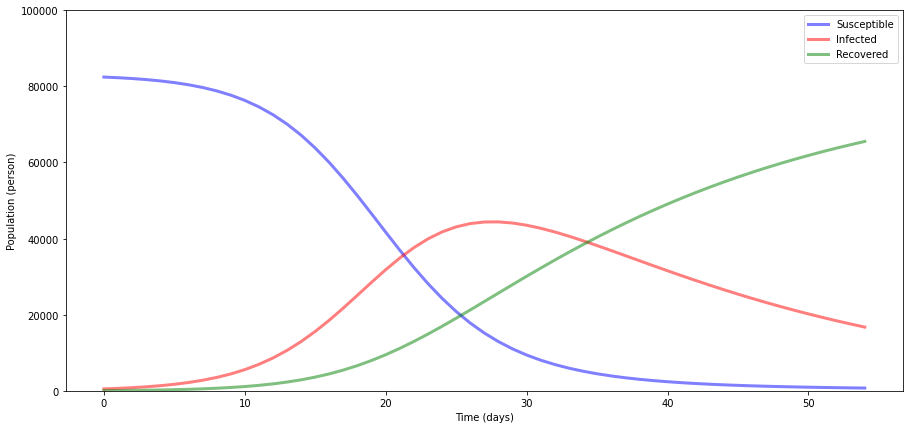

In [63]:
plt.figure(figsize = (15,7))
plt.plot(t, S1, 'b', alpha=0.5, lw=3, label='Susceptible')
plt.plot(t, I1, 'r', alpha=0.5, lw=3, label='Infected')
plt.plot(t, R1, 'g', alpha=0.5, lw=3, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population (person)')
plt.ylim(0, 100000)
legend = plt.legend()
legend.get_frame().set_alpha(0.8)
plt.show()

In [64]:
x = range(55)
y = inf
z = actual_red

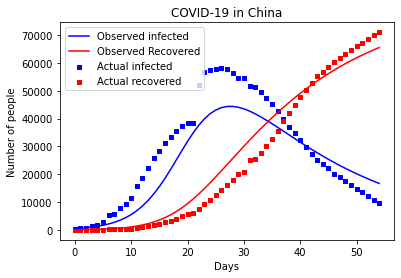

R0 =  5.999999999999999


In [65]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s = 10, c = 'b', marker = 's', label = 'Actual infected')
ax1.plot(t, I1, '-b', label = 'Observed infected')

ax1.scatter(x, z, s = 10, c = 'r', marker = 's', label = 'Actual recovered')
ax1.plot(t, R1, '-r', label = 'Observed Recovered')

ax1.set(xlabel = "Days", ylabel = "Number of people", title = "COVID-19 in China")
plt.legend(loc = 'upper left');
plt.show()

print('R0 = ', beta/gamma)

In [66]:
pip install ddeint


Note: you may need to restart the kernel to use updated packages.


6
Mininum beta, gamma, delay1, delay2 =  2.1668779181378595 0.04630230892163502 13 2


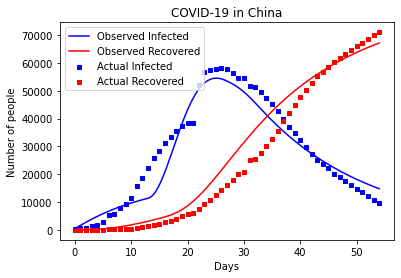

In [67]:
from pylab import array, linspace, subplots
from ddeint import ddeint

from random import seed
from random import random

nstep = 10  # number steps of Monte Carlo simulation

def model(Y, t, d1, d2, beta, gamma):
    x, y, z = Y(t)
    xd, yd, zd = Y(t - d1)
    xdd, ydd, zdd = Y(t - d2)
    return array([-beta*x*yd, beta*x*yd - gamma*ydd, gamma*ydd])

N = 82000
S0 = 81408
I0 = 547
R0 = 45

g = lambda t: array([S0/N, I0/N, R0/N])
tt = linspace(0, 54, 541)
              

rmse_inf_percent = [] 
beta = []
gamma = []
delay = []
delay_re = []

for i in range(nstep):
    value1 = random() 
    value2 = random()
    value3 = random()
    value4 = random() 

    #scaled = minv + (value * (maxv - minv))

    betar = 1.7 + (value1 * (2.4 - 1.7))   
    gammar = 0.03 + (value2 * (0.08 - 0.013))  
    delayr = round(7 + (value3 * (14 - 7)))  
    delayre = round(1 + (value4 * (7 - 1))) 
    
    yy = ddeint(model, g, tt, fargs=(delayr,delayre,betar,gammar))

    Ia = []
    for j in range(0,55):
        ii = j*10
        Ia.append(N*yy[ii,1])

    
    rmse_inf = np.sqrt(sum(np.power(np.abs(inf-Ia),2))/len(inf))
    rmse_inf_percent.append((rmse_inf/N)*100)
    
    beta.append(betar)
    gamma.append(gammar)
    delay.append(delayr)
    delay_re.append(delayre)

index_min = np.argmin(rmse_inf_percent)
print(index_min)
print('Mininum beta, gamma, delay1, delay2 = ',beta[index_min], gamma[index_min], delay[index_min], delay_re[index_min])

    
# Final results    
yf = ddeint(model, g, tt, fargs=(delay[index_min],delay_re[index_min], beta[index_min], gamma[index_min]))    

x = range(55)
y = inf
z = actual_red

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='Actual Infected')
ax1.plot(tt,N*yf[:,1],'-b', label='Observed Infected')

ax1.scatter(x, z, s=10, c='r', marker="s", label='Actual Recovered')
ax1.plot(tt,N*yf[:,2],'-r', label='Observed Recovered')

ax1.set(xlabel="Days",
       ylabel="Number of people",
       title="COVID-19 in China")

plt.legend(loc='upper left');
plt.show()


bb = beta[index_min]
gg = gamma[index_min]
d1 = delay[index_min]
d2 = delay_re[index_min]

In [68]:
import numpy as np
import matplotlib.pyplot as plt

#Defining the colors
colors = (0.6,0.6,0.9)

In [69]:


nd = len(Ia)

In [70]:
ts = []
Ratio = []

In [71]:
for i in range(d1,nd):
    Ratio.append(Ia[i-d1]/Ia[i-d2])
    ts.append(i)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


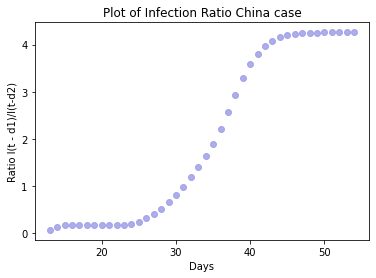

In [72]:
plt.scatter(ts, Ratio, c = colors, alpha = 0.8)
plt.title('Plot of Infection Ratio China case')
plt.xlabel('Days')
plt.ylabel('Ratio I(t - d1)/I(t-d2)')
plt.show()